In [ ]:
pip install -e .

In [ ]:
import gym
import gym_teen
import numpy as np
import time
import sys
import math
import random
from matplotlib import pyplot as plt

In [ ]:
def get_explore_rate(t,min_explore_rate,decay_fact):
    return max(min_explore_rate, min(0.8, 1.0 - math.log10((t+1)/decay_fact)))


def get_learning_rate(t,min_learning_rate,decay_fact):
    return max(min_learning_rate, min(0.8, 1.0 - math.log10((t+1)/decay_fact)))

In [ ]:
# variables: 
neps = 20
tstep = 200
min_explore_rate = 0.001
min_learning_rate = 0.2
#grid_size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
#decay_fact = np.prod(grid_size, dtype=float) / 10.0
decay_fact = np.prod((405,405),dtype=float)/10.0
#state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
explore_rate = get_explore_rate(0,min_explore_rate,decay_fact)
learning_rate = get_learning_rate(0,min_learning_rate,decay_fact)

In [ ]:
max_t = np.prod((405,405),dtype=int)*100
streak_to_end = 3
solved_t = np.prod((405,405),dtype=int)


In [ ]:
def select_action(env,state, q_table,explore_rate):
    # Select a random action
    if random.random() < explore_rate:
        action = env.action_space.sample()
    # Select the action with the highest q
    else:
        action = int(np.argmax(q_table[state]))
    return action

In [ ]:
def state_to_bucket(state,env):
    grid_size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
    state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
    bucket_indice = []
    for i in range(len(state)):
        if state[i] <= state_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_bounds[i][1]:
            bucket_index = grid_size[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = state_bounds[i][1] - state_bounds[i][0]
            offset = (grid_size[i]-1)*state_bounds[i][0]/bound_width
            scaling = (grid_size[i]-1)/bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indice.append(bucket_index)
    return tuple(bucket_indice)

In [ ]:
def run_qlearn(env,q_table, explore_rate, learning_rate, neps=1,tstep=1):
    env.render()
    num_streaks = 0
    discount_factor = 0.99
    max_t = np.prod((405,405),dtype=int)*100
    streak_to_end = 100
    solved_t = np.prod((405,405),dtype=int)
    decay_fact = np.prod((405,405),dtype=float)/10.0
    frames = []
    
    for ep in range(neps):
        if ep == 0:
            time.sleep(1)
        obv = env.reset()
        print('------------'+str(ep))
        state_0 = state_to_bucket(obv,env)
        total_reward = 0
        
        for t in range(tstep):
            # select best action and execute
            action = select_action(env,state_0, q_table, explore_rate)
            try: 
                obv,reward,done,_ = env.step(action)
                # print(obv.shape)
                # print(obv)
            except(IndexError):
                # print(action)
                # print(state_0)
                break
            
            # update the state you are in, add reward (observe result)
            state = state_to_bucket(obv,env)
            total_reward += reward
            #print(reward)
            #print('cur' + str(reward))
            #print(total_reward)
            #print(reward, total_reward)
            
            # update Q-table
            best_q = np.amax(q_table[state])
            q_table[state_0 + (action,)] += learning_rate * (reward + discount_factor * (best_q) - q_table[state_0 + (action,)])
            
            # update state
            state_0 = state
            



            frames.append(env.render())
            # plt.imshow(frame1)
            # plt.title(f"frame")
            # plt.show()
            #time.sleep(0.0000001)
            
            
            # update parameters
            #explore_rate = get_explore_rate(ep,min_explore_rate,decay_fact)
            #learning_rate = get_learning_rate(ep,min_learning_rate,decay_fact)
            
            if done:
                time.sleep(1)
                print("Episode %d finished after %f time steps with total reward = %f (streak %d)."
                      % (ep, t, total_reward, num_streaks))

                if t <= solved_t:
                    num_streaks += 1
                else:
                    num_streaks = 0
                break

            elif t >= max_t - 1:
                print("Episode %d timed out at %d with total reward = %f."
                      % (ep, t, total_reward))

        # It's considered done when it's solved over 120 times consecutively
        if num_streaks > streak_to_end:
            break
            
        explore_rate = get_explore_rate(ep,0.001,decay_fact)
        learning_rate = get_learning_rate(ep,0.2,decay_fact)
                
    return q_table, frames

In [ ]:
q_table0 = np.zeros((405,405) + (4,), dtype=float)

In [ ]:
env1 = gym.make('maze-v0',height=60,width=60)
#fin_q_table, frames1 = run_qlearn(env1,q_table0,explore_rate,learning_rate,neps=100,tstep=max_t)

In [ ]:
print(np.random.choice(env1.action_space))

# Torch DQN

In [1]:
import gym
import gym_teen
import numpy as np
import time
import sys
import math
import random
from matplotlib import pyplot as plt
import gym
from simple_dqn_torch import Agent
from utils import plot_learning_curve
import numpy as np

In [ ]:
env1 = gym.make('maze-v0',height=60,width=60)
print(env1.observation_space)

In [ ]:
observation1 = env1.reset()
score = 0
print(observation1.shape[0])

agent2 = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=4, eps_end=0.01,
                  input_dims=[2], lr=0.001)

action = agent2.choose_action(observation1)
print(action)
action = agent2.choose_action(observation1)
print(action)
action = agent2.choose_action(observation1)
print(action)
action = agent2.choose_action(observation1)
print(action)

#action = env1.action_space.sample()

#observation_, reward, done, info = env1.step(action)

observation_, reward, done, info = env1.step(action)
agent2.store_transition(observation1, action, reward, 
                        observation_, done)
agent2.learn()
observation1 = observation_

score += reward

pygame 2.1.2 (SDL 2.0.18, Python 3.9.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


/Users/xzhao/Desktop/RL_DL/gym-teen_2/simple_dqn_torch.py:74: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1640812094853/work/torch/csrc/utils/tensor_new.cpp:201.)
  state = T.tensor([observation]).float().to(self.Q_eval.device)


episode  0 score -107155.26 average score -107155.26 epsilon 0.29
episode  1 score -834158.42 average score -470656.84 epsilon 0.01
episode  2 score -826664.86 average score -589326.18 epsilon 0.01
episode  3 score -843644.51 average score -652905.76 epsilon 0.01
episode  4 score -809607.88 average score -684246.19 epsilon 0.01
episode  5 score -787478.00 average score -701451.49 epsilon 0.01
episode  6 score -989187.42 average score -742556.62 epsilon 0.01
episode  7 score -874746.64 average score -759080.37 epsilon 0.01
episode  8 score -953872.91 average score -780723.99 epsilon 0.01
episode  9 score -783582.86 average score -781009.88 epsilon 0.01
episode  10 score -611.94 average score -710064.61 epsilon 0.01
episode  11 score -899339.00 average score -725837.48 epsilon 0.01
episode  12 score -989520.09 average score -746120.75 epsilon 0.01
episode  13 score -774837.25 average score -748171.93 epsilon 0.01
episode  14 score -848837.77 average score -754882.99 epsilon 0.01
episode 

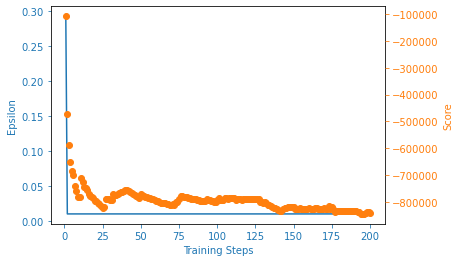

In [2]:
    env = gym.make('maze-v0',height=60,width=60)    

    agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=4, eps_end=0.01,
                  input_dims=[2], lr=0.001)
    scores, eps_history = [], []
    n_games = 200
    
    for i in range(n_games):
        score = 0
        done = False
        observation = env.reset()
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward, 
                                    observation_, done)
            agent.learn()
            observation = observation_
        scores.append(score)
        eps_history.append(agent.epsilon)

        avg_score = np.mean(scores[-100:])

        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score,
                'epsilon %.2f' % agent.epsilon)
    x = [i+1 for i in range(n_games)]
    filename = 'lunar_lander.png'
    plot_learning_curve(x, scores, eps_history, filename)


# Lunar Landing Demo

In [ ]:
  env = gym.make('LunarLander-v2')

In [ ]:
score = 0
done = False
observation = env.reset()
print(observation)

agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=4, eps_end=0.01,
                  input_dims=[8], lr=0.001)

action = agent.choose_action(observation)
print(action)

In [ ]:

score = 0
done = False
observation = env.reset()
    
action = agent.choose_action(observation)
observation_, reward, done, info = env.step(action)
score += reward
agent.store_transition(observation, action, reward, 
                        observation_, done)
agent.learn()
observation = observation_
scores.append(score)
eps_history.append(agent.epsilon)

        avg_score = np.mean(scores[-100:])


In [ ]:

    env = gym.make('LunarLander-v2')
    agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=4, eps_end=0.01,
                  input_dims=[8], lr=0.001)
    scores, eps_history = [], []
    n_games = 1
    
    for i in range(n_games):
        score = 0
        done = False
        observation = env.reset()
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward, 
                                    observation_, done)
            agent.learn()
            observation = observation_
        scores.append(score)
        eps_history.append(agent.epsilon)

        avg_score = np.mean(scores[-100:])

        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score,
                'epsilon %.2f' % agent.epsilon)
    x = [i+1 for i in range(n_games)]
    filename = 'lunar_lander.png'
    plotLearning(x, scores, eps_history, filename)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent

# knowledge buffer from previous games
from rl.memory import SequentialMemory

# Greedy is what allows us to find the best outcome, Linear is what allows us to optimize the strategy. 
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [ ]:
# takes in the states from our environment, and the actions from our environment. 
# number of frames or instances in the input. 
def build_model(height, width, channels, actions, window_length):
    model = Sequential()

    # 3 convolutional layers. 
    model.add(Convolution2D(32,(8,8),strides=(4,4), activation='relu', input_shape=(window_length,height,width, channels)))
    model.add(Convolution2D(64,(4,4),strides=(2,2), activation='relu'))
    model.add(Convolution2D(64,(3,3), activation='relu'))
    model.add(Flatten())

    # 3 dense layers
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    # takes image to an output of actions. 
    model.add(Dense(actions, activations='linear'))
    return model

In [ ]:
def build_agent(model, actions, window_length2):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length=window_length2)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    return dqn